In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import random
from typing import Callable
from collections.abc import Iterable

## Input

In [2]:
N_SAMPLES = 5000
N_TRIALS = 10

Original Sample

In [3]:
count = 38
size = 53

Null Hypothesis

In [4]:
p_null = 0.5

## Simulation Functions

In [5]:
def get_randomization_dist(
    sampling_func: Callable, n_trials: int, n_samples: int, *args, **kwargs):
    """
    Creates `n_trials` randomization distributions (RD) for a difference in
    means using an input sampling function and returns the RD corresponding to
    the median standard error.
    """
    samples, rd_centers, rd_se = [], [], []
    
    for _ in range(n_trials):

        s = [] # container for current trial
        for _ in range(n_samples):
        
            s.append(sampling_func(*args, **kwargs))

        samples.append(s)    
        rd_centers.append(sum(s) / len(s))
        rd_se.append(np.std(s, ddof = 1))

    i = (rd_se == np.sort(rd_se)[len(rd_se)//2]).argmax() # get index of median
   
    return samples[i], rd_centers[i], rd_se[i]


def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(30, 0), textcoords='offset points')

def plot_hist(diffs, avg, se, bins):
        
    fig, ax = plt.subplots(figsize =(8,6))
    ax = sns.histplot(x = diffs, bins = bins, ax = ax)

    ax.axvline(x=avg, linewidth=2, color='firebrick', linestyle = 'dashed')
    add_text(ax, f'Mean: {avg:.4f}, SE = {se:.4f}', (avg+0.02, 500))
    return ax

def add_sample_stat(ax, x):
    ax.axvline(x=x, linewidth=3, color='blue', linestyle = 'solid')

## Running Simulation

In [6]:
def get_sample_proportion(p_null: float, sample_size: int):

    sample = random.choices([1,0], weights=[p_null, 1-p_null], k=sample_size)
    return sum(sample)/sample_size   

In [7]:
diffs, avg, se = get_randomization_dist(
    get_sample_proportion, N_TRIALS, N_SAMPLES, p_null = p_null, sample_size = size)

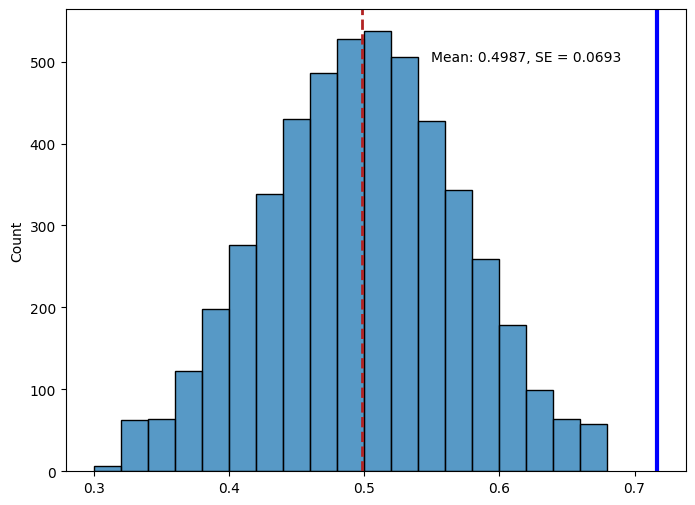

In [8]:
ax = plot_hist(diffs, avg, se, np.arange(0.3, 0.7, 0.02))
add_sample_stat(ax, count/size)

## Running Simulation: Rolling Dice

You roll a die 60 times and record the sample proportion of 5’s, and you want to test whether the die is biased to give more 5’s than a fair die would ordinarily give. To find the p-value for your sample data, you create a randomization distribution of proportions of 5’s in many simulated samples of
size 60 with a fair die.

In [17]:
sample_statistic = 6/60
diffs, avg, se = get_randomization_dist(
    get_sample_proportion, N_TRIALS, N_SAMPLES, p_null = 1/6, sample_size = 60)

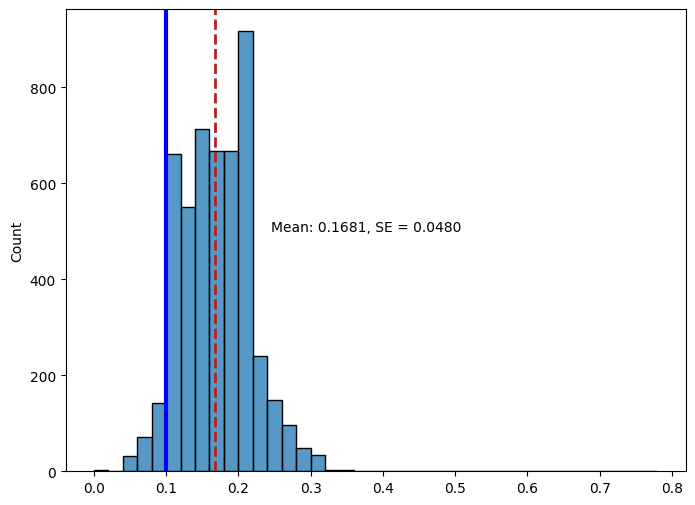

In [18]:
ax = plot_hist(diffs, avg, se, np.arange(0, 0.8, 0.02))
add_sample_stat(ax, sample_statistic)

In [19]:
sum(np.array(diffs) <= sample_statistic) / N_SAMPLES

0.1028

## Running Simulation: Testing the Lady Tasting Tea

a historical scenario in which a British woman, Muriel Bristol-Roach, claimed to
be able to tell whether milk had been poured into a cup before or after the tea. An experiment was conducted in which Muriel was presented with 8 cups of tea, and for each cup she correctly guessed whether the milk was added first or the tea added first. 

Let’s assume that Muriel did not know beforehand how many of the 8 cups had tea first and how many had milk first. Let p represent the true proportion of times Muriel can guess correctly. Our hypotheses are $H_0 ∶ p = 0.5$ (random guessing) and $H_a ∶ p > 0.5$.

In [20]:
sample_statistic = 8/8
diffs, avg, se = get_randomization_dist(
    get_sample_proportion, N_TRIALS, N_SAMPLES, p_null = 0.5, sample_size = 8)

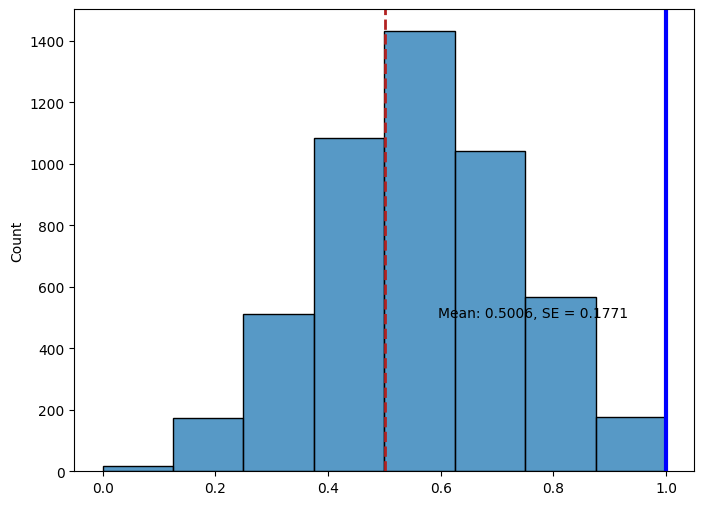

In [24]:
ax = plot_hist(diffs, avg, se, np.arange(0, 1+0.001, 1/8))
add_sample_stat(ax, sample_statistic)

p-value

In [26]:
sum(np.array(diffs) >= sample_statistic) / N_SAMPLES

0.0048